In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.cm as cm

from src.Question_A_funcs import simulation_dla

save_folder = 'fig'
os.makedirs(save_folder, exist_ok=True)

[1, 25, 22, 35, 46, 74, 20, 15, 110, 65, 30, 85, 83, 8, 42, 108, 14, 41, 149, 47, 169, 30, 185, 43, 15, 33, 92, 55, 52, 148, 214, 245, 45, 127, 48, 143, 227, 110, 174, 93, 166, 297, 74, 42, 104, 226, 81, 62, 163, 88, 50, 16, 222, 42, 51, 62, 48, 74, 99, 18, 219, 173, 64, 90, 30, 38, 36, 46, 196, 105, 47, 62, 136, 98, 38, 38, 65, 52, 221, 195, 114, 50, 77, 173, 73, 38, 72, 173, 281, 84, 161, 201, 95, 172, 33, 35, 170, 87, 79, 168, 50, 24, 56, 39, 55, 156, 26, 30, 101, 242, 67, 236, 61, 38, 257, 25, 72, 131, 52, 159, 91, 191, 96, 83, 89, 18, 145, 118, 20, 75, 202, 59, 93, 32, 16, 45, 21, 124, 33, 34, 45, 117, 87, 86, 52, 25, 221, 27, 112, 109, 132, 118, 100, 125, 33, 127, 142, 439, 472, 57, 174, 52, 107, 53, 266, 73, 192, 341, 127, 58, 160, 45, 611, 1000, 272, 49, 90, 638, 45, 65, 316, 139, 99, 42, 68, 204, 42, 318, 241, 23, 31, 240, 100, 264, 56, 42, 50, 73, 79, 152, 422, 122, 262, 50, 49, 786, 374, 1000, 138, 10, 38, 43, 85, 86, 276, 37, 153, 36, 42, 67, 111, 98, 44, 31, 61, 57, 109, 1

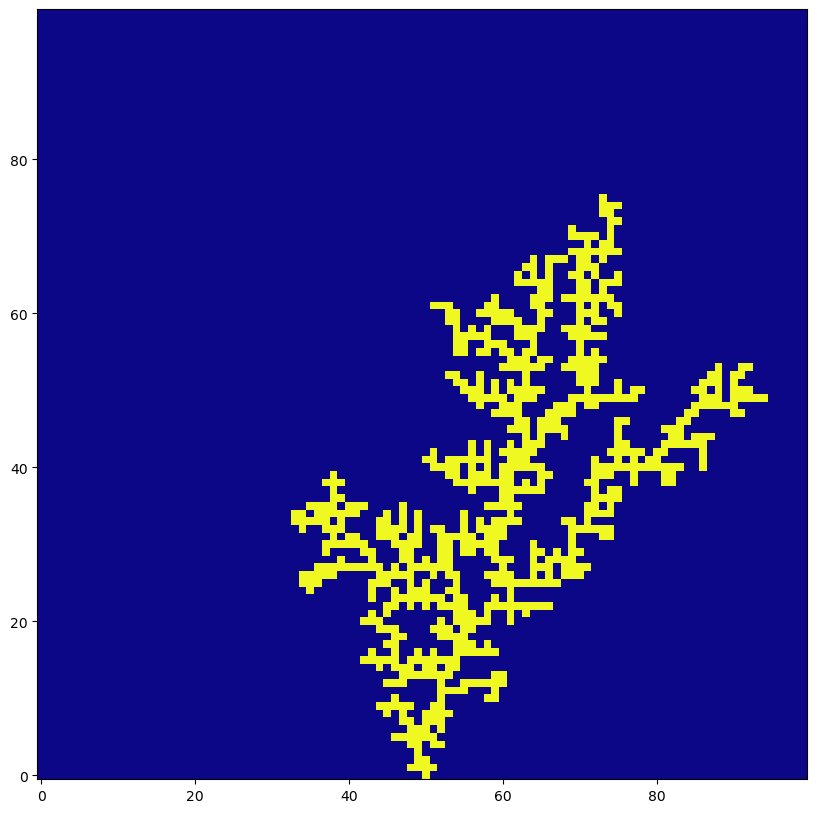

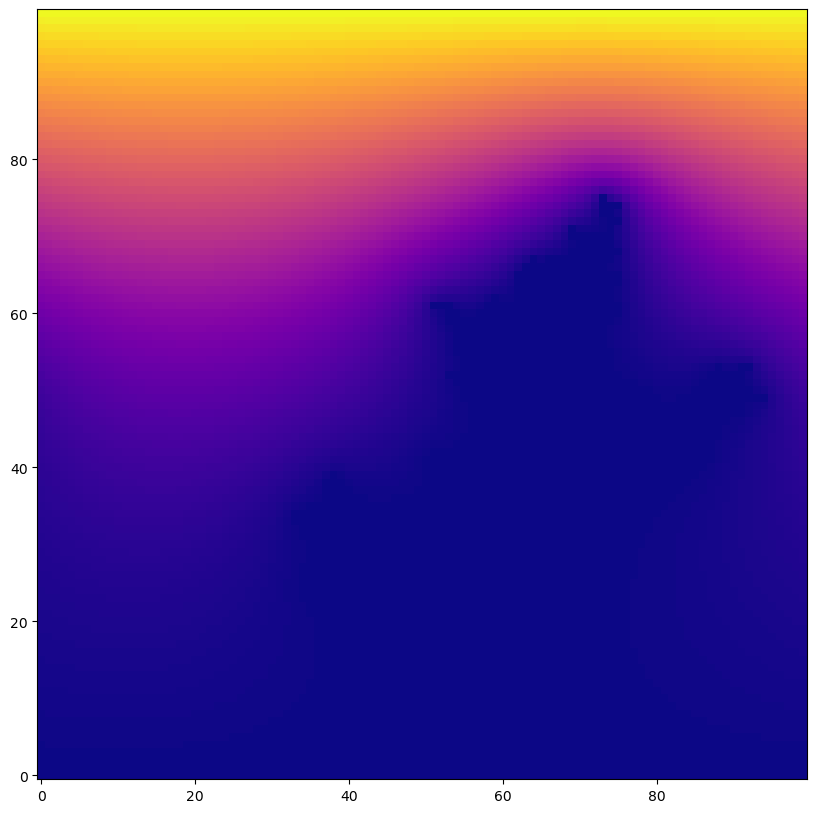

In [ ]:
# Plotting of one claster with its concentration map

c, cluster, avg_iter = simulation_dla(grid_size=(100, 100), steps=800, eta=1, w=1.8)

plt.figure(figsize=(10, 10))   
plt.imshow(cluster, origin='lower', cmap='plasma')
plt.show()

plt.figure(figsize=(10, 10))   
plt.imshow(c, origin='lower', cmap='plasma')
plt.show()

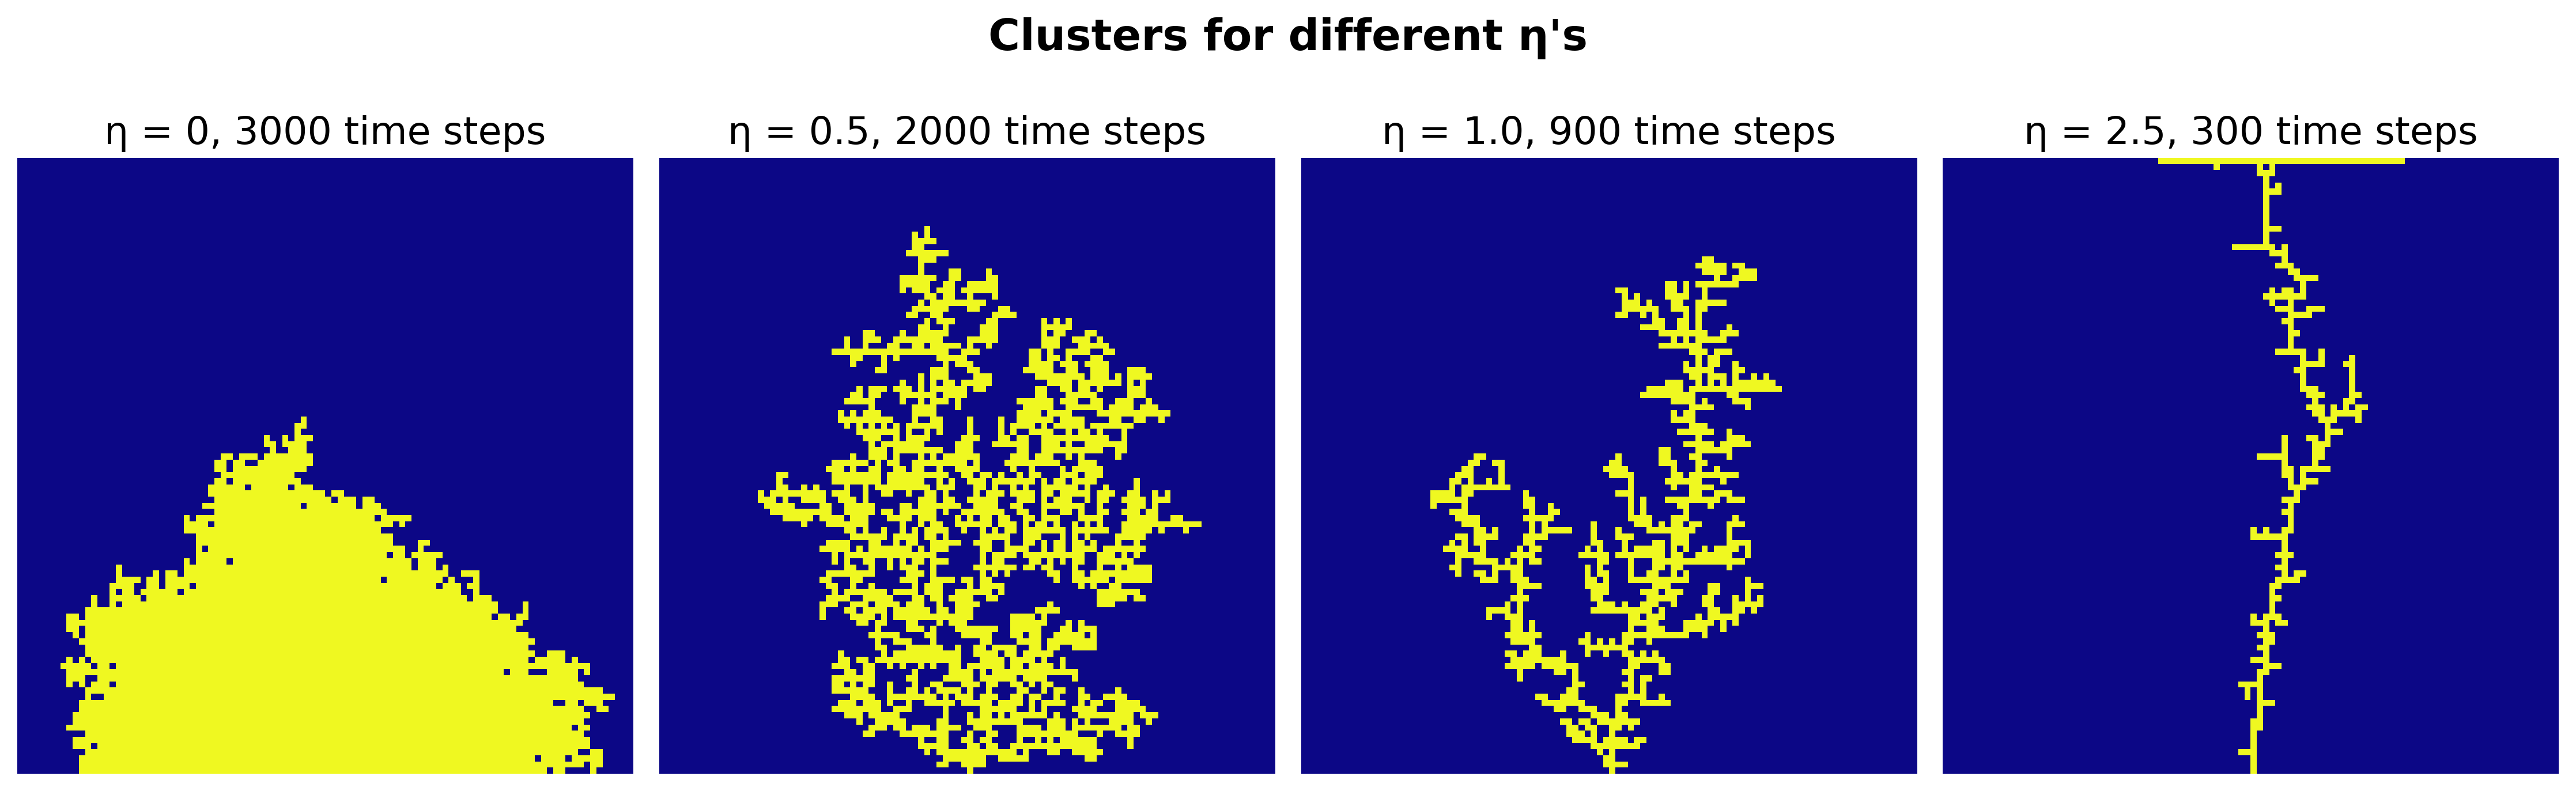

In [ ]:
# Investigate the effect of η on the cluster growth

fig, axes = plt.subplots(1, 4, figsize=(15, 5), dpi=300) # Initialize figure

etas = [0, 0.5, 1.0, 2.5] # Different η's
steps_list = [3000, 2000, 900, 250] # Different number of time steps to obtain similar cluster radious

for ind, eta in enumerate(etas): # Loop over different η's and plot the obtained clusters
    c, cluster, avg_iter = simulation_dla(grid_size=(100, 100), steps=steps_list[ind], eta=eta, w=1.8)
    axes[ind].imshow(cluster, origin='lower', cmap='plasma')
    axes[ind].set_title(f'η = {eta}, {steps_list[ind]} time steps', fontsize=16)
    axes[ind].axis('off')

fig.suptitle("Clusters for different η's", fontsize=18, fontweight='semibold') # General title
plt.tight_layout()

# Save the figure
save_path = os.path.join(save_folder, f'Question A.png')
plt.savefig(save_path, dpi=300)
plt.show()

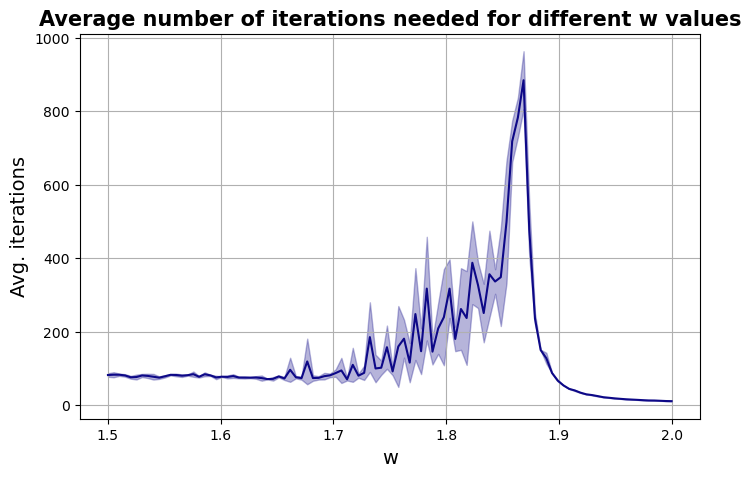

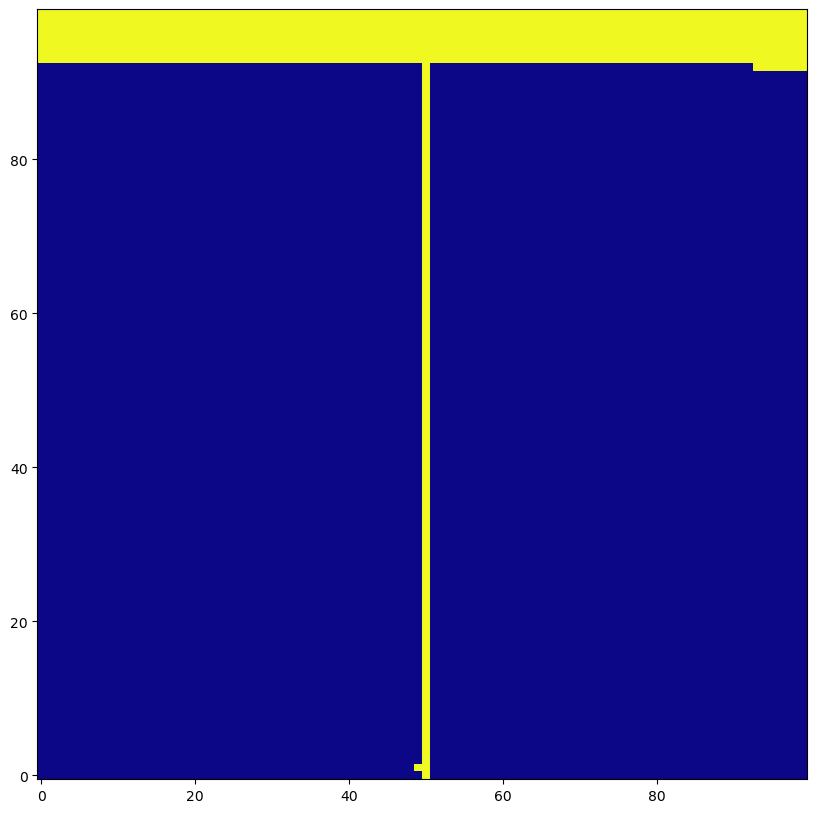

In [4]:
# Investigate the effect of w on the time needed to grow the cluster

w_list = np.linspace(1.5, 2.0, 100) # Different w values
iters = []

for index, w in enumerate(w_list): # Loop over different w values
    iters.append([])
    for _ in range(3): # Repeat the simulation 5 times to get the average time
        c, cluster, avg_iter = simulation_dla(grid_size=(100, 100), steps=500, eta=1, w=w)
        iters[index].append(avg_iter) # Save the time needed

# Calculate the mean and standard deviation of the number of iter. needed for each w
mean_iters = np.mean(iters, axis=1)
std_iters = np.std(iters, axis=1)

# Plot the results
cmap = plt.colormaps["plasma"]
line_color = cmap(0)
plt.figure(figsize=(8, 5))
plt.plot(w_list, mean_iters, label='Avg. Iterations', color=line_color)
plt.fill_between(w_list, mean_iters - std_iters, mean_iters + std_iters, color=line_color, alpha=0.3, label='Confidence Interval')
plt.xlabel('w', fontsize=14)
plt.ylabel('Avg. iterations', fontsize=14)
plt.title('Average number of iterations needed for different w values', fontsize=15, fontweight='semibold')
plt.grid()
save_path = os.path.join(save_folder, f'Question A - w.png')
plt.savefig(save_path, dpi=300)
plt.show()

# Show the (anomalous) resulting cluster for high w
c, cluster, avg_iter = simulation_dla(grid_size=(100, 100), steps=800, eta=1, w=2)
plt.figure(figsize=(10, 10))   
plt.imshow(cluster, origin='lower', cmap='plasma')
plt.show()
